
**A SIMPLE DATA EXPLORATION.
**
Using a dataset on kaggle I tried to do a little data exploration by using the most common plot

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
df = pd.read_csv('../input/StudentsPerformance.csv')
# Any results you write to the current directory are saved as output.

**SUMMARY OF DATASET**

In [21]:
df.head(10) #summary


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [22]:
df.columns #names of columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Gender Count**

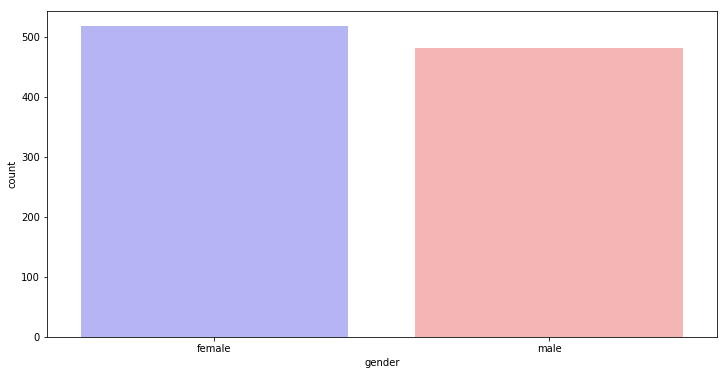

In [23]:
plt.figure(figsize=(12,6))
df.gender.value_counts()
sns.countplot(x="gender", data=df, palette="bwr")
plt.show()

**PARENTAL LEVEL OF EDUCATION
**

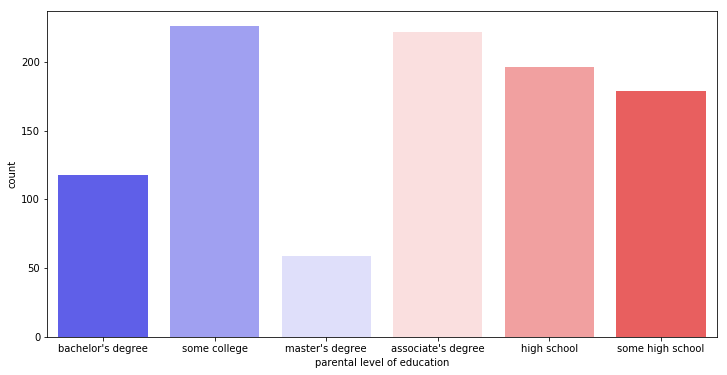

In [24]:
df.gender.value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x="parental level of education", data=df, palette="bwr")
plt.show()

**# 'Completed Pre-test divided by gender'**

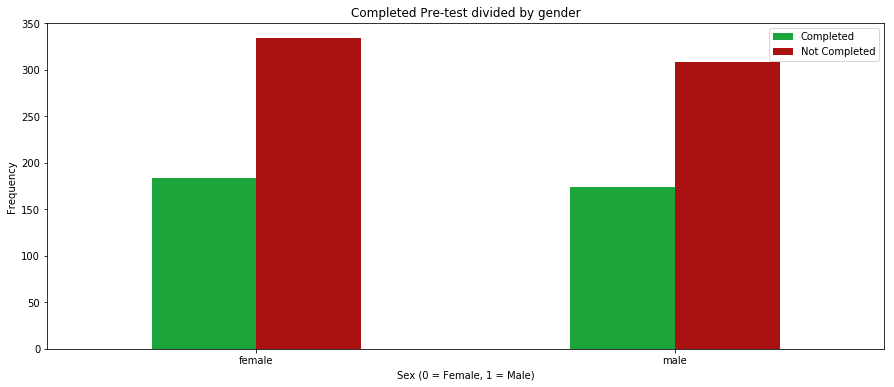

In [25]:
pd.crosstab(df.gender,df['test preparation course']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Completed Pre-test divided by gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Completed", "Not Completed"])
plt.ylabel('Frequency')
plt.show()

**# TEST PREPARATION COURSE
**

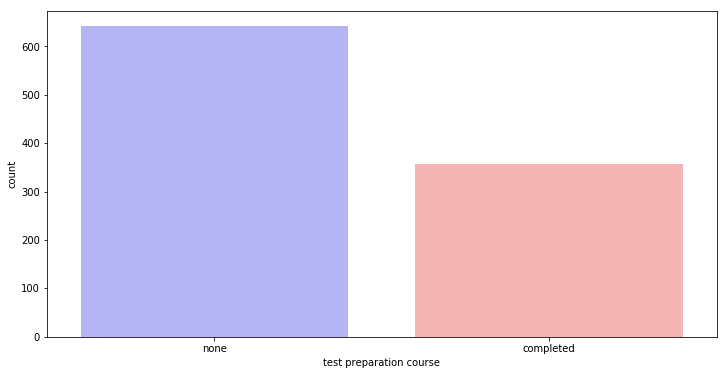

In [26]:
df['test preparation course'].value_counts()
plt.figure(figsize=(12,6))

sns.countplot(x="test preparation course", data=df, palette="bwr")
plt.show()

Distribution by ethnicity

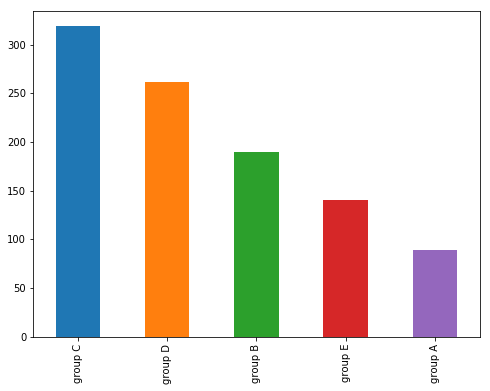

In [27]:
plt.figure(figsize=(8,6))
df['race/ethnicity'].value_counts().head(10).plot.bar()


**Treating the categorical variables**
One hot econding

In [28]:
df_treat = pd.get_dummies(df)
df_treat.dtypes.value_counts()
df_treat.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,71,83,78,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,88,95,92,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,40,43,39,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,64,64,67,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,38,60,50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


**# DISTRIBUTION OF TESTS SCORING
**

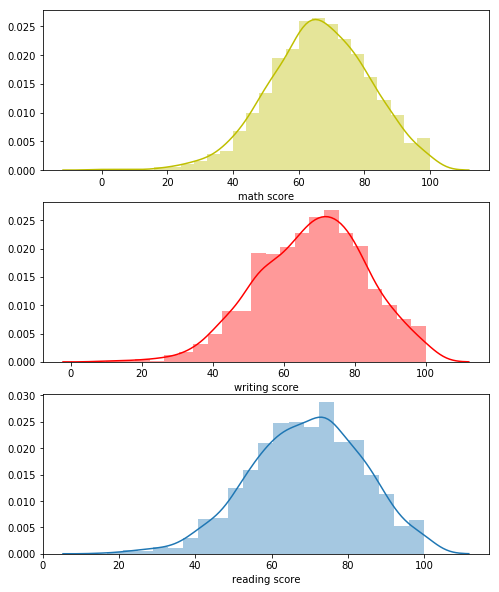

In [29]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.distplot(df['math score'],ax=ax1,color="y")
sns.distplot(df['writing score'],ax=ax2,color="r")
sns.distplot(df['reading score'],ax=ax3)


**SCATTER PLOT**

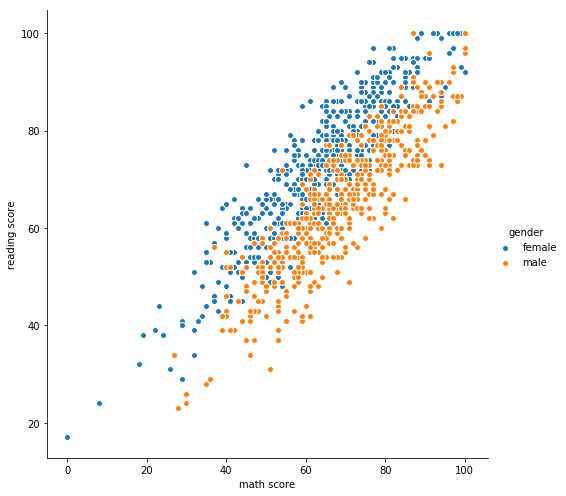

In [30]:
g = sns.FacetGrid(df, hue='gender', size = 7)
g.map(plt.scatter, 'math score','reading score', edgecolor="w")
g.add_legend()

Of course the girl are better in math than the men!!!!!!!!

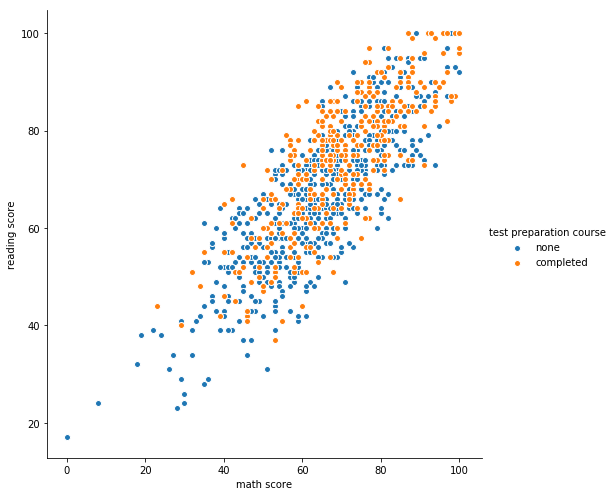

In [31]:
g = sns.FacetGrid(df, hue='test preparation course', size = 7)
g.map(plt.scatter, 'math score','reading score', edgecolor="w")
g.add_legend()

Distribution of tests scoring by gender

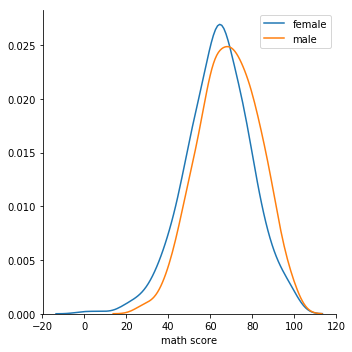

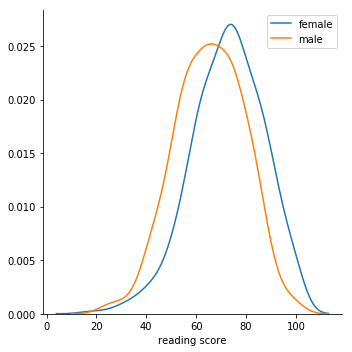

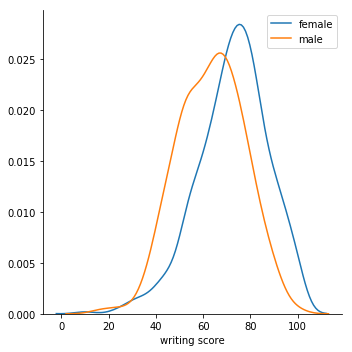

In [32]:
p = sns.FacetGrid(data = df, hue = 'gender', size = 5, legend_out=True)
p = p.map(sns.kdeplot, 'math score')
plt.legend()
p = sns.FacetGrid(data = df, hue = 'gender', size = 5, legend_out=True)
p = p.map(sns.kdeplot, 'reading score')
plt.legend()
p = sns.FacetGrid(data = df, hue = 'gender', size = 5, legend_out=True)
p = p.map(sns.kdeplot, 'writing score')

plt.legend()

The distribution plot confirm: girls are better than mens as you can see!!